# **SIMPLE LINEAR REGRESSION**
## **TASK 1**

**Author: Sneha Ganesh**


Simple Linear Regression is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. The relationship shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression. The key point in Simple Linear Regression is that the dependent variable must be a continuous/real value.

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

**Mounting to google drive as the file is saved in the drive**

### **Import the Student Scores dataset from the drive**


In [2]:
score_df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [5]:
score_df.to_csv("Student_Scores.csv")

In [6]:
print(score_df.head())
print("\nDATAFRAME SHAPE",score_df.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

DATAFRAME SHAPE (25, 2)


The Student Score dataset has 25 rows and 2 columns.

In [7]:
score_df.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no Null or NaN values in the dataset.

In [8]:
score_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
score_df.value_counts()

Hours  Scores
9.2    88        1
4.5    41        1
1.5    20        1
1.9    24        1
2.5    21        1
       30        1
2.7    25        1
       30        1
3.2    27        1
3.3    42        1
3.5    30        1
3.8    35        1
4.8    54        1
8.9    95        1
5.1    47        1
5.5    60        1
5.9    62        1
6.1    67        1
6.9    76        1
7.4    69        1
7.7    85        1
7.8    86        1
8.3    81        1
8.5    75        1
1.1    17        1
dtype: int64

### **Descriptive Statistics of the Data**

In [11]:
score_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


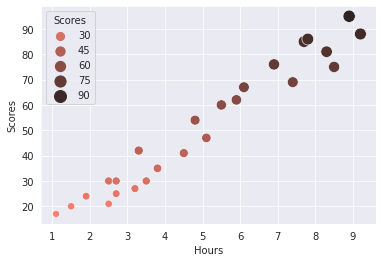

In [12]:
sns.set_style('darkgrid')
sns.scatterplot(data=score_df, x="Hours", y="Scores",hue="Scores", size="Scores", sizes=(50,150), palette="dark:salmon_r")

CORRELATION COEFFICIENT

Is there a good enough reason to fit a linear regression model?
– Check if the two variables in general have a linear relationship.
- From the above plot it can be seen there is a positive correlation between the predictor variable and response variable.
- Positive relation between Scores and Hours.
- It states that the hours of studying is related to the scores obtained.
- As the number of hours increases the scores relatively increases.

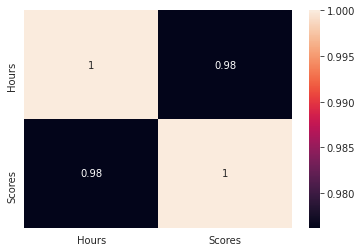

In [13]:
sns.heatmap(score_df.corr() ,annot=True)

The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation.

A value of 0 means no correlation.

Here default is karl pearson's method

Finding correlation between x and y

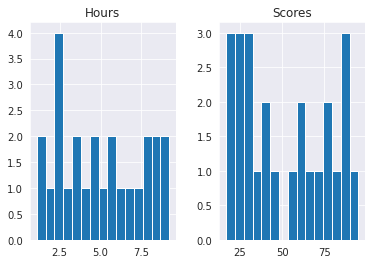

In [14]:
#To check distribution of variables
score_df.hist(bins=15)
plt.show()

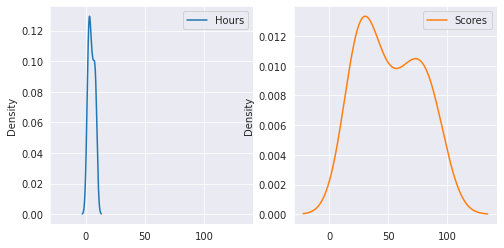

In [15]:
# Density Plot
score_df.plot(kind="density",subplots=True, sharex=True, sharey=False,layout=(1,2),figsize=(8,4))
plt.show()

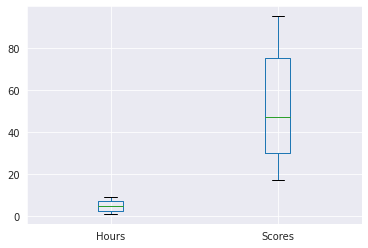

In [16]:
score_df.boxplot()

In [17]:
# To predict scores using the hours
X=score_df.iloc[:,:-1].values
Y=score_df.iloc[:,1].values
# X=X.values.reshape(len(X),1)
# Y=Y.values.reshape(len(Y),1)
X.shape,Y.shape

((25, 1), (25,))

In [18]:
from sklearn.model_selection import train_test_split
seed=10
test_size=0.3
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)

In [19]:
X_train.shape,X_test.shape,y_train.shape

((17, 1), (8, 1), (17,))

In [20]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualize the Training Set and Testing Set Results

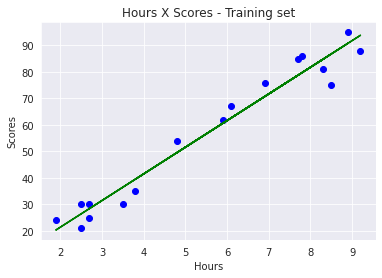

In [21]:
#Training Set
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Hours X Scores - Training set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

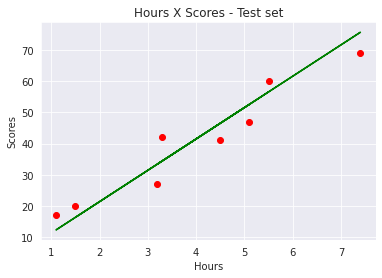

In [22]:
#Test Set 
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, reg.predict(X_test), color='green')
plt.title('Hours X Scores - Test set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

From the above two plots, we can see teh two green lines are the same direction. Our model is good to use now.

In [23]:
# Predicting the Test set results
y_pred=reg.predict(X_test)

In [24]:
# Compare the Actual Values and the Predicted Values
pred_df=pd.DataFrame({'Actual Scores':y_test,'Predicted Scores':y_pred})
pred_df

,Actual Scores,Predicted Scores
0,20,16.315821
1,47,52.560275
2,42,34.438048
3,27,33.431257
4,41,46.519533
5,69,75.716454
6,17,12.288659
7,60,56.587436


## **QUESTION:** 
### **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [25]:
hrs=9.25
predicted_score=reg.predict([[hrs]])
print("The Predicted score if a student studies for {} hrs/day then the predicted score is {}.".format(hrs,predicted_score))

The Predicted score if a student studies for 9.25 hrs/day then the predicted score is [94.34207607].


### **Evaluation Metrics**

**R Squared**

It is called as coefficient determination and defines the degree to which variance in the dependent variable can be explained by the variable.
R square value can be between 0 and 1. 1 means best fit.

In [26]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [27]:
print('R Squared Value:', r2_score(y_test,y_pred))

R Squared Value: 0.8944542088325093


In [28]:
# Using mean squared error (MSE) to evaluate the performance of our model 
# MSE is the average of the square of the difference between the original and predicted values of the data
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 31.556542406092728


In [29]:
# RMSE is the standard deviation of the errors it is same as MSE but the root of the value is considered
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  5.617521019639599


In [43]:
import plotly.graph_objs as go
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=pred_df.index, y=pred_df['Predicted Scores']),
    go.Bar(name='Actual', x=pred_df.index, y=pred_df['Actual Scores'])
])
fig.update_layout(barmode='group', title="Predicted VS Actual Scores", title_x=0.5)
fig.show()